In [1]:
from fastai import *
from fastai.vision import *
from PIL import Image

In [3]:
import torch
print(torch.__version__)

1.3.1


In [2]:
import sys
print ("Python version:", sys.version)

Python version: 3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]


In [3]:
p_data = Path('../data-dev/')    # Path to export.pkl (trained model)
p_data.exists()

True

## Open with PIL Image.open()

True


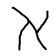

In [10]:
p_img = p_data/'alef-1/186ab8812def469eb59337cd436b70f5.png'
print(p_img.exists())
Image.open(p_img)

## Open with fastai open_image()

True
torch.Size([3, 56, 56])


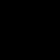

In [12]:
p_img = p_data/'alef-1/186ab8812def469eb59337cd436b70f5.png'
print(p_img.exists())
img = open_image(p_img)
print(img.shape)
img

# Solution 1 (not good)
### image gets saved inverted (black <-> white)

torch.Size([4, 56, 56])
torch.Size([1, 56, 56])
<class 'torch.Tensor'>


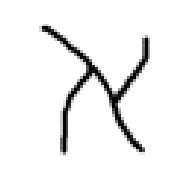

In [6]:
p_img = p_data/'alef-1/186ab8812def469eb59337cd436b70f5.png'
image = Image.open(p_img)
#tensor = pil2tensor(image, dtype=float)
tensor = pil2tensor(image, np.float32)
print(tensor.shape)
# discard alpha channel from png
noalpha = tensor[3:,:,:]
print(noalpha.shape)
print(type(noalpha))
show_image(noalpha)

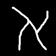

In [7]:
import torchvision

out = p_data/'alef-1/out.png'

torchvision.utils.save_image(noalpha, out, normalize=True, range=(0,255))
open_image(out)

# Solution 2 

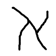

In [8]:
def pure_pil_alpha_to_color_v2(image, color=(255, 255, 255)):
    # Alpha composite an RGBA Image with a specified color.
    # https://stackoverflow.com/questions/9166400/convert-rgba-png-to-rgb-with-pil
    image.load()  # needed for split()
    background = Image.new('RGB', image.size, color)
    background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
    return background

p_img = p_data/'alef-1/186ab8812def469eb59337cd436b70f5.png'
test = pure_pil_alpha_to_color_v2(Image.open(p_img))
test.save(out)
open_image(out)

True
torch.Size([3, 56, 56])


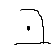

In [13]:
p_img = p_data/'bet-2/bet-1.jpg'
print(p_img.exists())
img = open_image(p_img)
print(img.shape)
img

In [ ]:
??open_image

### Create dir if dir does not exist